# Importing the necessary libraries and data for a little analysis

In [9]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st

In [11]:
!ls .

README.md                         heart-eda-and-ml.ipynb
advance-data-preprocessing.ipynb  heartdisease-eda-prediction.ipynb
data                              notebook


In [12]:
!ls ./data/

heart_2020_cleaned.csv


In [13]:
train = pd.read_csv("./data/heart_2020_cleaned.csv")

Get a basic description of numeric data

In [14]:
train.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


Let's look at the data

In [15]:
train.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


Let's look at the distribution of the target variable

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

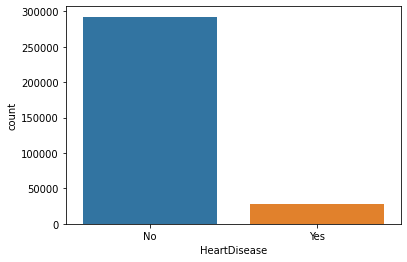

In [16]:
sns.countplot(x='HeartDisease',data=train)

Because there are few numerical variables in the data, then I propose to separate numerical variables and discrete variables

In [17]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.columns

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

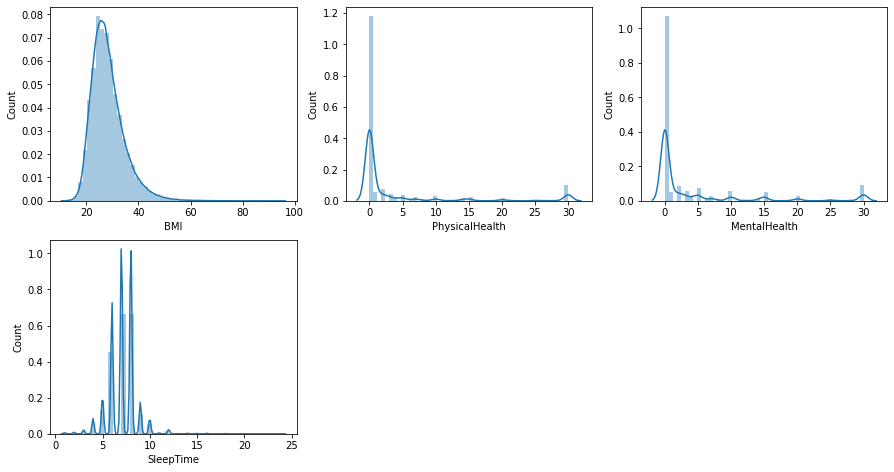

In [18]:
i=1
plt.figure(figsize = (15,25))
for feature in numeric_features.columns:
    plt.subplot(6,3,i)
    sns.distplot(train[feature],kde=True)
    plt.xlabel(feature)
    plt.ylabel("Count")
    i+=1

In [27]:
categorical_features = train.select_dtypes(include=[np.object])
categorical_features.columns

/var/folders/gw/nlwybk3j1xg2460c9jy7tm900000gn/T/ipykernel_1873/2107377905.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = train.select_dtypes(include=[np.object])


Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

Let's look at unique values in categorical objects

In [35]:
type(train["HeartDisease"].mode())

pandas.core.series.Series

In [36]:
train["HeartDisease"].mode().iloc[0]

'No'

In [29]:
len(set(train["HeartDisease"]))

2

In [30]:
# pd.get_dummies("")

In [ ]:
train

In [38]:
set(train["HeartDisease"])

{'No', 'Yes'}

In [37]:
train["HeartDisease"].unique()

array(['No', 'Yes'], dtype=object)

In [31]:
for column_name in train.columns:
    if train[column_name].dtypes == 'object':
        # fillna 填充缺失值
        # 如果有缺失，就用众数填充 mode() ，众数可能有多个，直接取第一个iloc[0]
        train[column_name] = train[column_name].fillna(train[column_name].mode().iloc[0])
        
        #train[column_name].unique() 求column_name这个特征取值的可能性有几种 等价于len(set(train[column_name]))
        unique_category = len(train[column_name].unique())
        print("Feature '{column_name}' has '{unique_category}' unique categories".format(column_name = column_name,
                                                                                         unique_category=unique_category))

Feature 'HeartDisease' has '2' unique categories
Feature 'Smoking' has '2' unique categories
Feature 'AlcoholDrinking' has '2' unique categories
Feature 'Stroke' has '2' unique categories
Feature 'DiffWalking' has '2' unique categories
Feature 'Sex' has '2' unique categories
Feature 'AgeCategory' has '13' unique categories
Feature 'Race' has '6' unique categories
Feature 'Diabetic' has '4' unique categories
Feature 'PhysicalActivity' has '2' unique categories
Feature 'GenHealth' has '5' unique categories
Feature 'Asthma' has '2' unique categories
Feature 'KidneyDisease' has '2' unique categories
Feature 'SkinCancer' has '2' unique categories


Let's look at the distribution of the number of people with heart disease from various factors

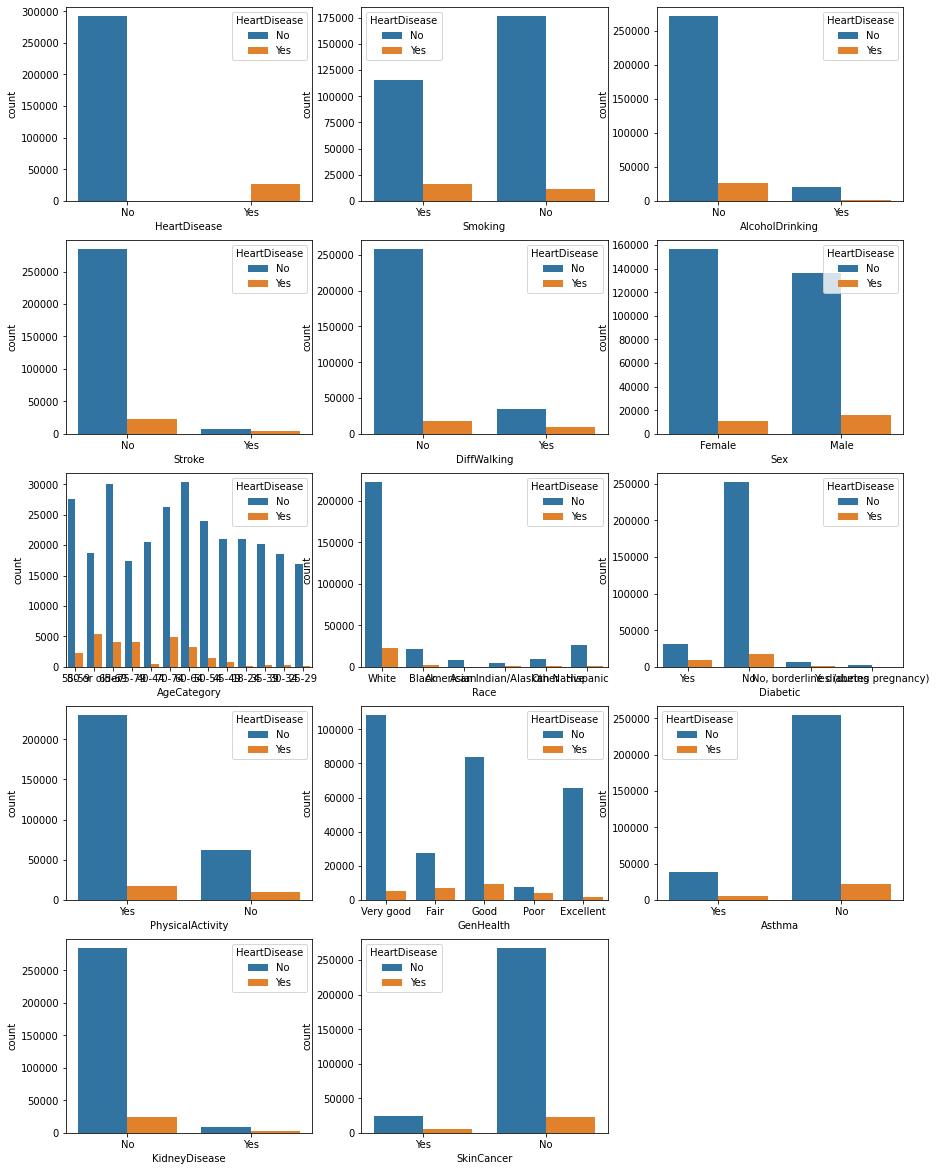

In [32]:
i = 1

# 画一个 15 * 25 大小的图
plt.figure(figsize = (15,25))

# 遍历特征
for feature in categorical_features:
    # 画子图 
    plt.subplot(6,3,i)
    sns.countplot(x = feature,hue = 'HeartDisease' , data = train)
    i +=1

I propose to look at the distribution of categorical variables depending on gender

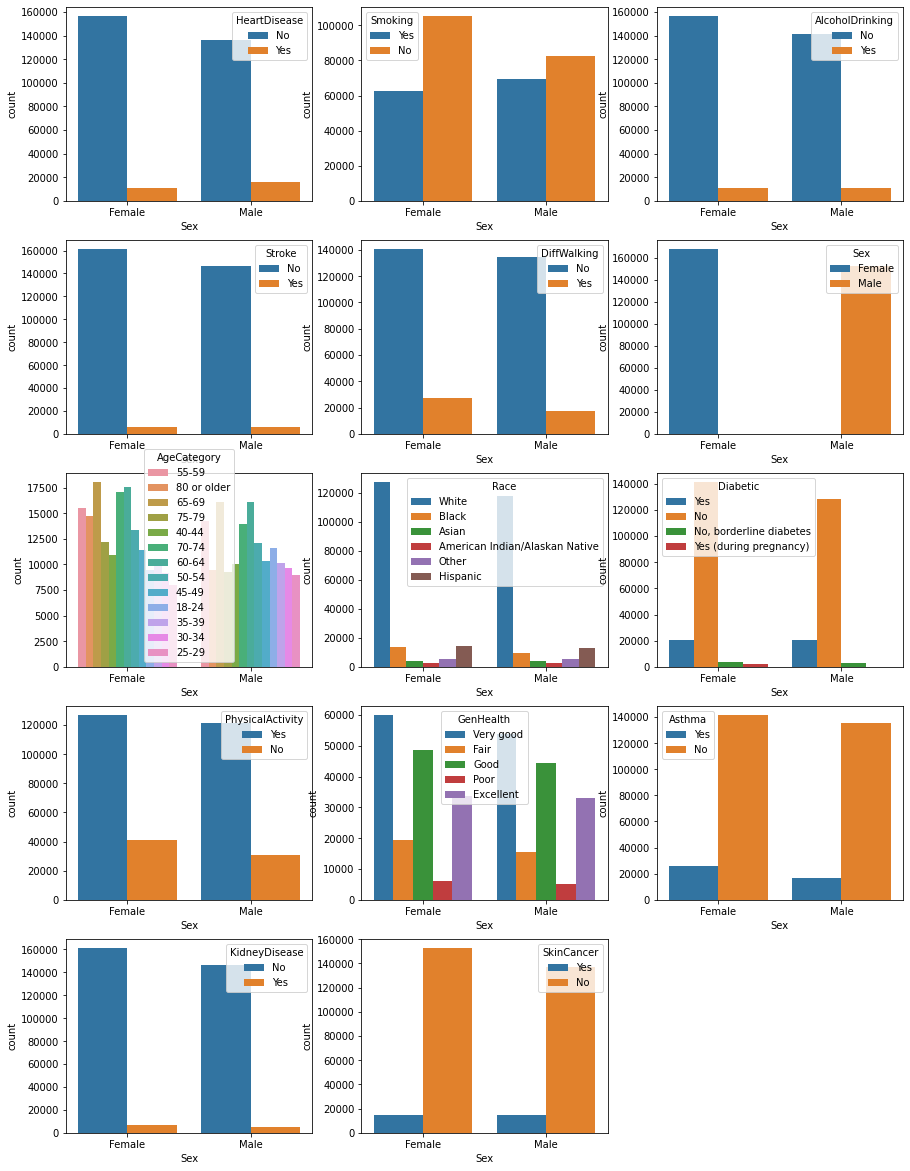

In [33]:
i = 1
plt.figure(figsize = (15,25))
for col in categorical_features:
    plt.subplot(6,3,i)
    sns.countplot(x = 'Sex',hue = categorical_features[col] , data = train)
    i +=1

Let's look at outliers in numerical variables depending on several factors

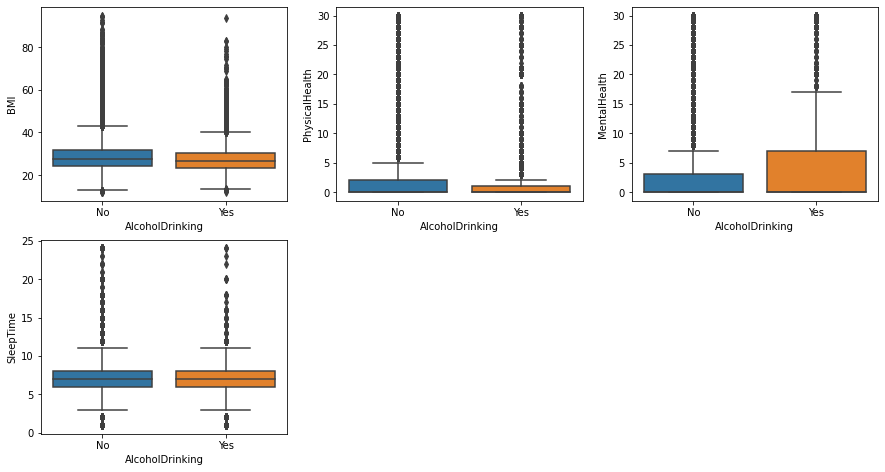

In [39]:
i=1
plt.figure(figsize=(15,25))
for feature in numeric_features:
    plt.subplot(6,3,i)
    sns.boxplot(y=train[feature], x = train['AlcoholDrinking'])
    i+=1

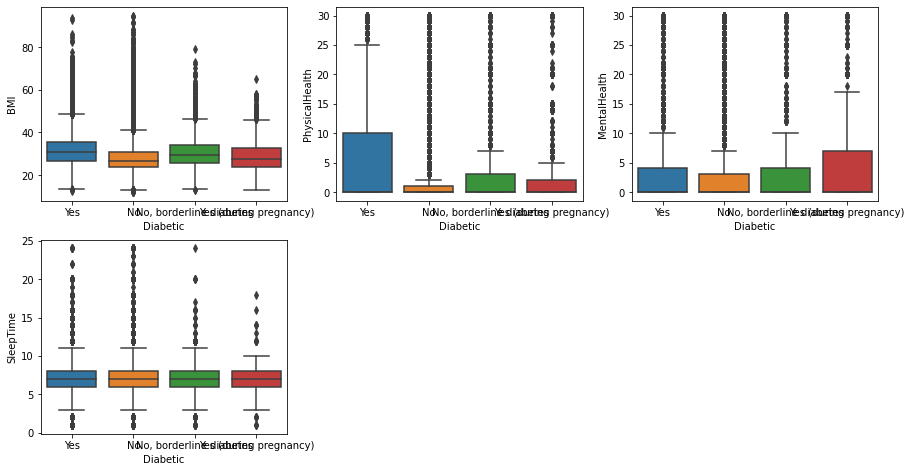

In [40]:
i=1
plt.figure(figsize=(15,25))
for feature in numeric_features:
    plt.subplot(6,3,i)
    sns.boxplot(y=train[feature], x = train['Diabetic'])
    i+=1

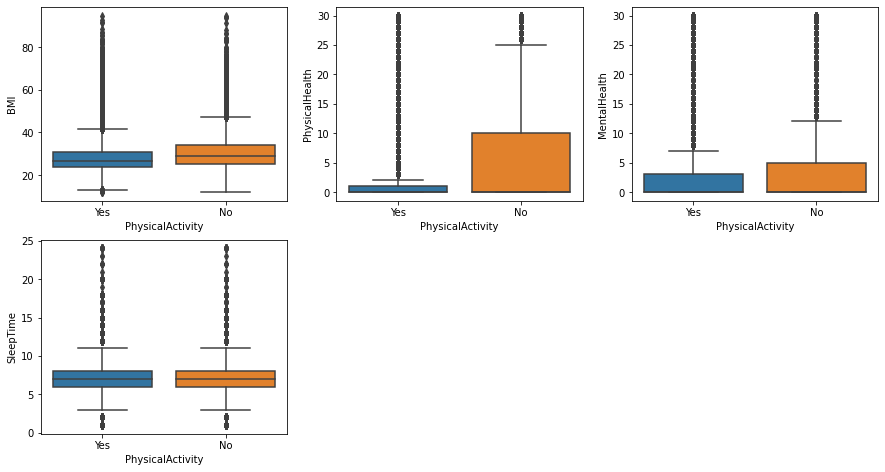

In [41]:
i=1
plt.figure(figsize=(15,25))
for feature in numeric_features:
    plt.subplot(6,3,i)
    sns.boxplot(y=train[feature], x = train['PhysicalActivity'])
    i+=1

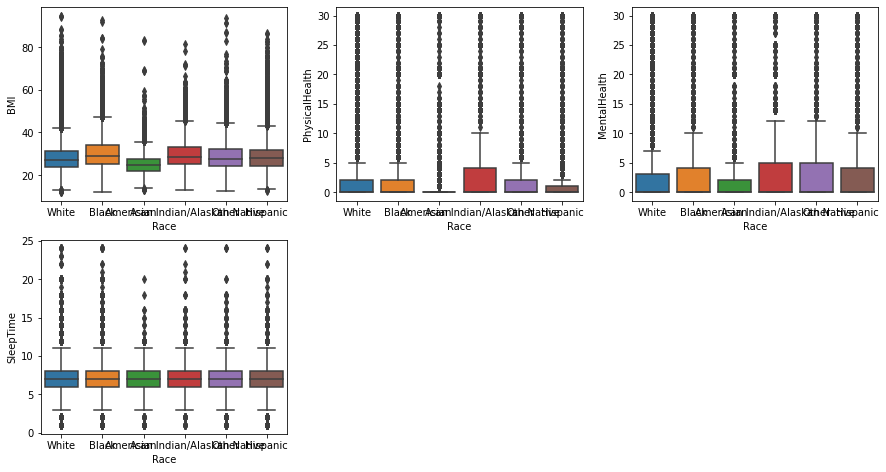

In [42]:
i=1
plt.figure(figsize=(15,25))
for feature in numeric_features:
    plt.subplot(6,3,i)
    sns.boxplot(y=train[feature], x = train['Race'])
    i+=1

# Let's do a target feature prediction. First, let's encode the variables

In [47]:
train['id']=range(1,319796)

In [48]:
train=train.set_index('id')

In [49]:
train

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
id,,,,,,,,,,,,,,,,,,
1,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
2,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
3,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
4,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
5,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319791,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319792,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319793,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No


In [50]:
cat_features_oh=categorical_features.columns

In [51]:
for name in cat_features_oh:
    Dummies=pd.get_dummies(train[name]).add_prefix(name)
    train=train.merge(Dummies,on='id')
    train=train.drop([name],axis=1)

In [52]:
y=train.HeartDiseaseYes

Let's build a correlation table

In [53]:
correlation = train.corr()
print(correlation['HeartDiseaseYes'].sort_values(ascending = False),'\n')

HeartDiseaseYes                       1.000000
DiffWalkingYes                        0.201258
StrokeYes                             0.196835
DiabeticYes                           0.183072
GenHealthPoor                         0.174662
PhysicalHealth                        0.170721
GenHealthFair                         0.147954
KidneyDiseaseYes                      0.145197
AgeCategory80 or older                0.143041
SmokingYes                            0.107764
PhysicalActivityNo                    0.100030
AgeCategory75-79                      0.098690
SkinCancerYes                         0.093317
AgeCategory70-74                      0.082578
SexMale                               0.070040
BMI                                   0.051803
AgeCategory65-69                      0.042626
AsthmaYes                             0.041444
RaceWhite                             0.040121
GenHealthGood                         0.039033
AlcoholDrinkingNo                     0.032080
MentalHealth 

Index(['HeartDiseaseYes', 'DiffWalkingYes', 'StrokeYes', 'DiabeticYes',
       'GenHealthPoor', 'PhysicalHealth', 'GenHealthFair', 'KidneyDiseaseYes',
       'AgeCategory80 or older', 'SmokingYes', 'PhysicalActivityNo',
       'AgeCategory75-79', 'SkinCancerYes', 'AgeCategory70-74', 'SexMale'],
      dtype='object')


<AxesSubplot:>

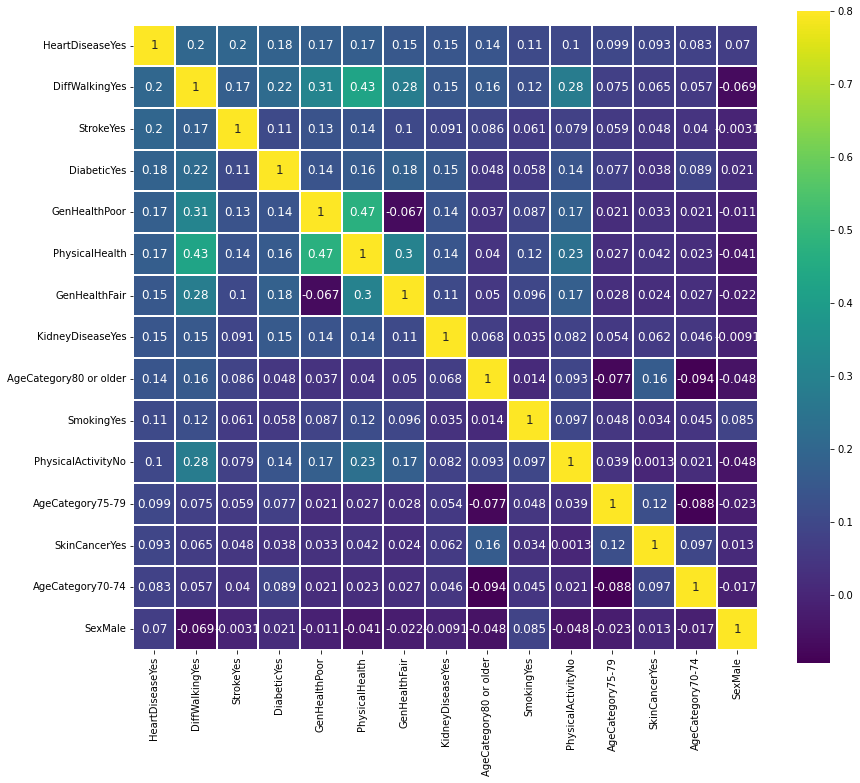

In [55]:
k= 15
cols = correlation.nlargest(k,'HeartDiseaseYes')['HeartDiseaseYes'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

In [57]:
train=train.drop(['HeartDiseaseYes','HeartDiseaseNo'],axis=1)

KeyError: "['HeartDiseaseYes', 'HeartDiseaseNo'] not found in axis"

In [58]:
train

,BMI,PhysicalHealth,MentalHealth,SleepTime,SmokingNo,SmokingYes,AlcoholDrinkingNo,AlcoholDrinkingYes,StrokeNo,StrokeYes,...,GenHealthFair,GenHealthGood,GenHealthPoor,GenHealthVery good,AsthmaNo,AsthmaYes,KidneyDiseaseNo,KidneyDiseaseYes,SkinCancerNo,SkinCancerYes
id,,,,,,,,,,,,,,,,,,,,,
1,16.60,3.0,30.0,5.0,0,1,1,0,1,0,...,0,0,0,1,0,1,1,0,0,1
2,20.34,0.0,0.0,7.0,1,0,1,0,0,1,...,0,0,0,1,1,0,1,0,1,0
3,26.58,20.0,30.0,8.0,0,1,1,0,1,0,...,1,0,0,0,0,1,1,0,1,0
4,24.21,0.0,0.0,6.0,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,1
5,23.71,28.0,0.0,8.0,1,0,1,0,1,0,...,0,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319791,27.41,7.0,0.0,6.0,0,1,1,0,1,0,...,1,0,0,0,0,1,1,0,1,0
319792,29.84,0.0,0.0,5.0,0,1,1,0,1,0,...,0,0,0,1,0,1,1,0,1,0
319793,24.24,0.0,0.0,6.0,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,1,0


Normalizing data

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
scaler = MinMaxScaler()
names = train.columns
d = scaler.fit_transform(train)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,SmokingNo,SmokingYes,AlcoholDrinkingNo,AlcoholDrinkingYes,StrokeNo,StrokeYes,...,GenHealthFair,GenHealthGood,GenHealthPoor,GenHealthVery good,AsthmaNo,AsthmaYes,KidneyDiseaseNo,KidneyDiseaseYes,SkinCancerNo,SkinCancerYes
0,0.055294,0.100000,1.0,0.173913,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.100447,0.000000,0.0,0.260870,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.175782,0.666667,1.0,0.304348,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.147169,0.000000,0.0,0.217391,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,0.141132,0.933333,0.0,0.304348,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [63]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score

/usr/local/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [64]:
X_train, X_test, y_train, y_test=train_test_split(scaled_df,y,test_size=0.1,random_state=42)

Let's build simple models and evaluate the quality of their training

In [65]:
models = [KNeighborsClassifier(), LogisticRegression(), XGBClassifier()]
scores = dict()

for m in models:
    # 训练
    m.fit(X_train, y_train)
    # 预测
    y_pred = m.predict(X_test)

    # 评估
    print(f'model: {str(m)}')
    print(f'Accuracy_score: {accuracy_score(y_test,y_pred)}')
    print(f'Precission_score: {precision_score(y_test,y_pred)}')
    print(f'Recall_score: {recall_score(y_test,y_pred)}')
    print(f'F1-score: {f1_score(y_test,y_pred)}')
    print('-'*30, '\n')

model: KNeighborsClassifier()
Accuracy_score: 0.9039399624765478
Precission_score: 0.40359168241965976
Recall_score: 0.148884239888424
F1-score: 0.21752419765664802
------------------------------ 

model: LogisticRegression()
Accuracy_score: 0.9123514696685429
Precission_score: 0.5602968460111317
Recall_score: 0.10529986052998605
F1-score: 0.1772820663340182
------------------------------ 



/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:57:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Accuracy_score: 0.9123827392120075
Precission_score: 0.567346938775510

High accuracy is explained by a large proportion of healthy people. When dealing with imbalanced classes, this metric is useless. More informative metrics are precission,recall. Precision can be interpreted as the proportion of objects called positive by the classifier and at the same time are really positive, and recall shows what proportion of objects of a positive class out of all objects of a positive class the algorithm found. The balance between these two metrics is F1-score. It is the introduction of precision that does not allow us to write all objects into one class, since in this case we get an increase in the False Positive level. Recall demonstrates the algorithm's ability to detect a given class in general, while precision demonstrates the ability to distinguish this class from other classes. To solve our problem, you should choose the algorithm with the highest recall, but the choice of the final algorithm is up to you. It would be possible to search for the optimal hyperparameters of the model, but since Since the problem is exploratory in nature, we will leave the search for hyperparameters for competitions.